In [594]:
import numpy as np # linear algebra, data manipulation
import pandas as pd # data processing, # Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# change to  dates and time default formats
from datetime import datetime


In [595]:
train_data= pd.read_csv('C:\\Users\\HP\\Desktop\\train_users_2.csv')
test_data= pd.read_csv('C:\\Users\\HP\\Desktop\\test_users.csv')

In [596]:
train_data.describe()

,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013083e+13,49.668335,3.267387
std,9.253690e+09,155.666612,7.637707
min,2.009030e+13,1.000000,0.000000
25%,2.012120e+13,28.000000,0.000000
50%,2.013090e+13,34.000000,0.000000
75%,2.014030e+13,43.000000,0.000000
max,2.014060e+13,2014.000000,25.000000


In [597]:
train_data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,6/28/2010,2.009030e+13,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,5/25/2011,2.009050e+13,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,9/28/2010,2.009060e+13,8/2/2010,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,12/5/2011,2.009100e+13,9/8/2012,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,9/14/2010,2.009120e+13,2/18/2010,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [598]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  float64
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

Data needs preprocessing as there are many null values

In [599]:
train_data.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [600]:
#explore numerical columns, starting with age
train_data.age.describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

In [601]:
train_data.loc[(train_data.age > 95) | (train_data.age < 15), 'age'] = np.nan
train_data['age']= train_data['age'].fillna(train_data['age'].median())


#I choose to fill with median because it's robust with outliers
train_data.age.isnull().sum()#checking for null values after filling

0

In [602]:
#We cannot delete rows that contain unknown and others because there is a large amount of data
train_data['gender'].value_counts()

-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64

In [603]:

train_data.dropna(inplace=True) #The dropna () method removes the rows that contains NULL values
train_data.isnull().sum()

id                         0
date_account_created       0
timestamp_first_active     0
date_first_booking         0
gender                     0
age                        0
signup_method              0
signup_flow                0
language                   0
affiliate_channel          0
affiliate_provider         0
first_affiliate_tracked    0
signup_app                 0
first_device_type          0
first_browser              0
country_destination        0
dtype: int64

<AxesSubplot: >

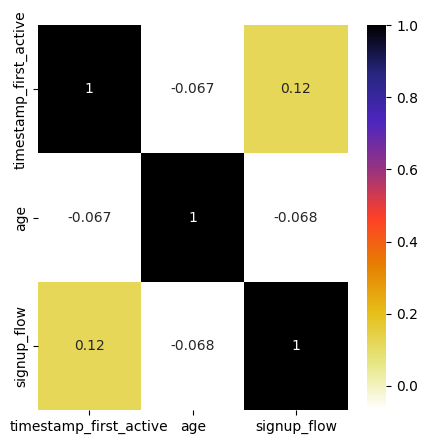

In [604]:
train_data=train_data.drop_duplicates() #used to remove duplicate values
train_data =train_data.drop(['id'],axis=1) #removing id because it is not useful in our dataset , values are very large
cor=train_data.corr()# see correlation
plt.figure(figsize=(5,5))
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)

In [605]:
import warnings
warnings.simplefilter('ignore')

In [606]:
train_data['date_account_created'] = pd.to_datetime((train_data['date_account_created']))
g=train_data.groupby('date_account_created').agg('count')['country_destination']
g

date_account_created
2010-01-01      1
2010-01-02      1
2010-01-03      1
2010-01-04      3
2010-01-07      1
             ... 
2014-06-26    194
2014-06-27    192
2014-06-28    165
2014-06-29    162
2014-06-30    223
Name: country_destination, Length: 1611, dtype: int64

In [607]:
gf = pd.DataFrame(g)
gf.reset_index(inplace=True)
gf = gf.rename(columns={'date_account_created': 'date', 'country_destination': 'Passengers'})
gf

,date,Passengers
0,2010-01-01,1
1,2010-01-02,1
2,2010-01-03,1
3,2010-01-04,3
4,2010-01-07,1
...,...,...
1606,2014-06-26,194
1607,2014-06-27,192
1608,2014-06-28,165
1609,2014-06-29,162


<AxesSubplot: xlabel='date'>

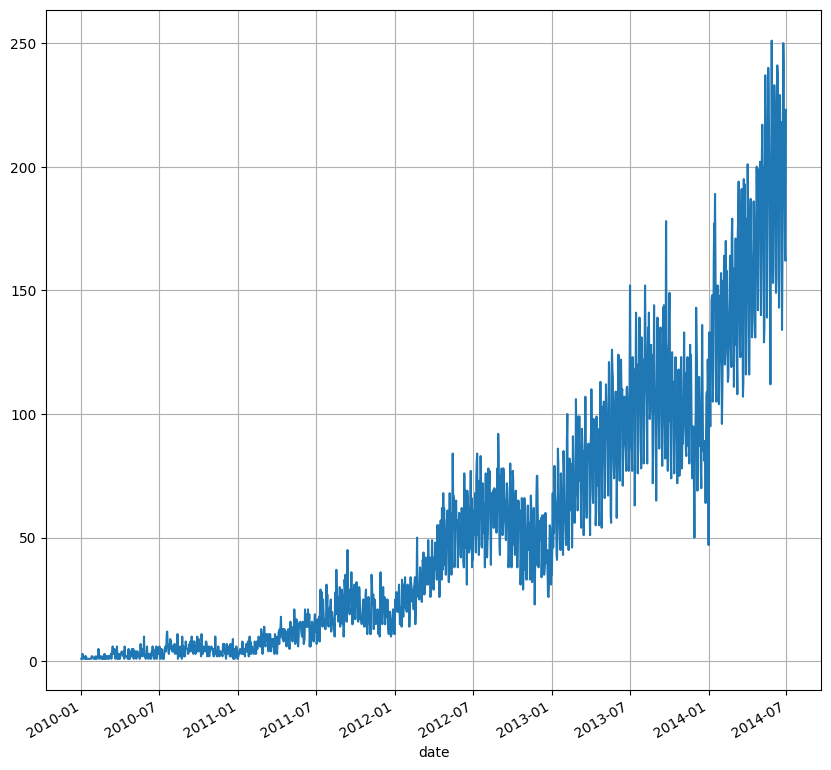

In [608]:
ec_gf= gf.set_index('date')
ec_data = ec_gf['Passengers']
plt.figure(figsize=(10,10)) 
ec_data.plot(grid=True)

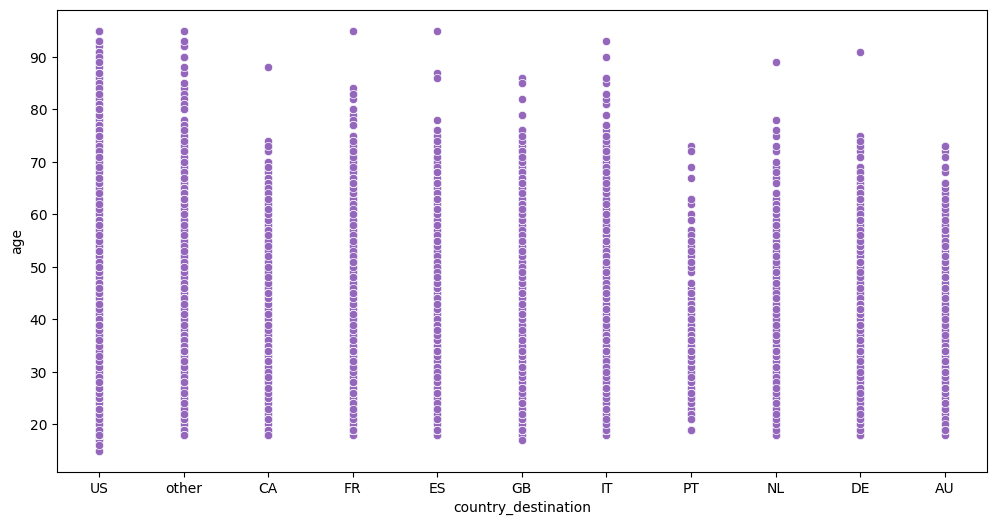

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87170 entries, 2 to 213445
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date_account_created     87170 non-null  datetime64[ns]
 1   timestamp_first_active   87170 non-null  float64       
 2   date_first_booking       87170 non-null  object        
 3   gender                   87170 non-null  object        
 4   age                      87170 non-null  float64       
 5   signup_method            87170 non-null  object        
 6   signup_flow              87170 non-null  int64         
 7   language                 87170 non-null  object        
 8   affiliate_channel        87170 non-null  object        
 9   affiliate_provider       87170 non-null  object        
 10  first_affiliate_tracked  87170 non-null  object        
 11  signup_app               87170 non-null  object        
 12  first_device_type        87170 

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
2,2010-09-28,2.009060e+13,8/2/2010,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,2011-12-05,2.009100e+13,9/8/2012,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,2010-09-14,2.009120e+13,2/18/2010,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,2010-01-01,2.010010e+13,1/2/2010,-unknown-,34.0,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,2010-01-02,2.010010e+13,1/5/2010,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US


In [609]:

plt.figure(figsize=(12,6))
sns.scatterplot(x='country_destination',y='age',data=train_data,color='#9467bd')
plt.show()
train_data.info()
# Converting to date time format
#train_data['date_account_created'] = pd.to_datetime((train_data['date_account_created']))
#train_data['date_first_booking'] = pd.to_datetime(train_data['date_first_booking'])
#train_data['timestamp_first_active'] = pd.to_datetime(train_data['timestamp_first_active'], format='%Y%m%d%H%M%S')
train_data.head()


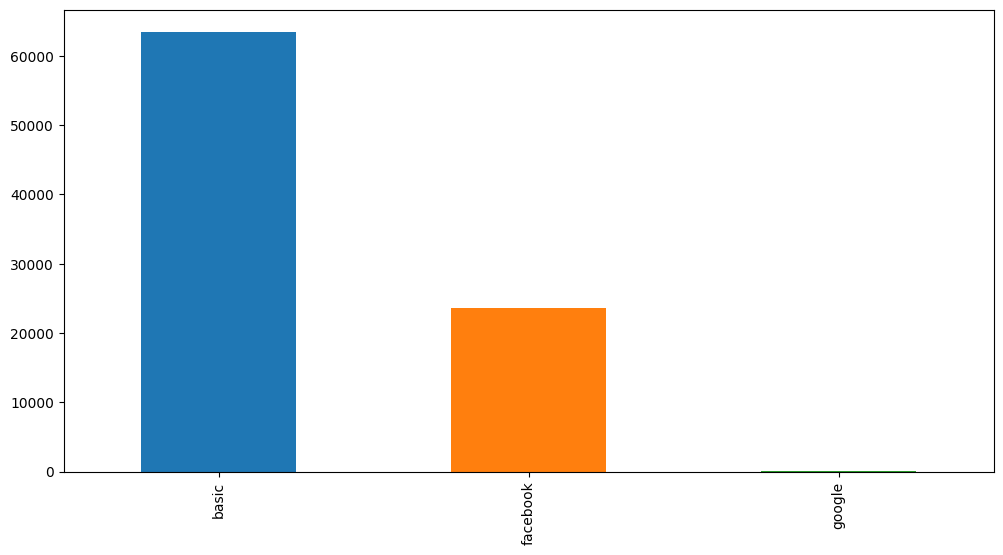

In [610]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'] 
plt.figure(figsize=(12,6))
train_data.signup_method.value_counts(dropna=False).plot(kind='bar',color=colors)
plt.show()

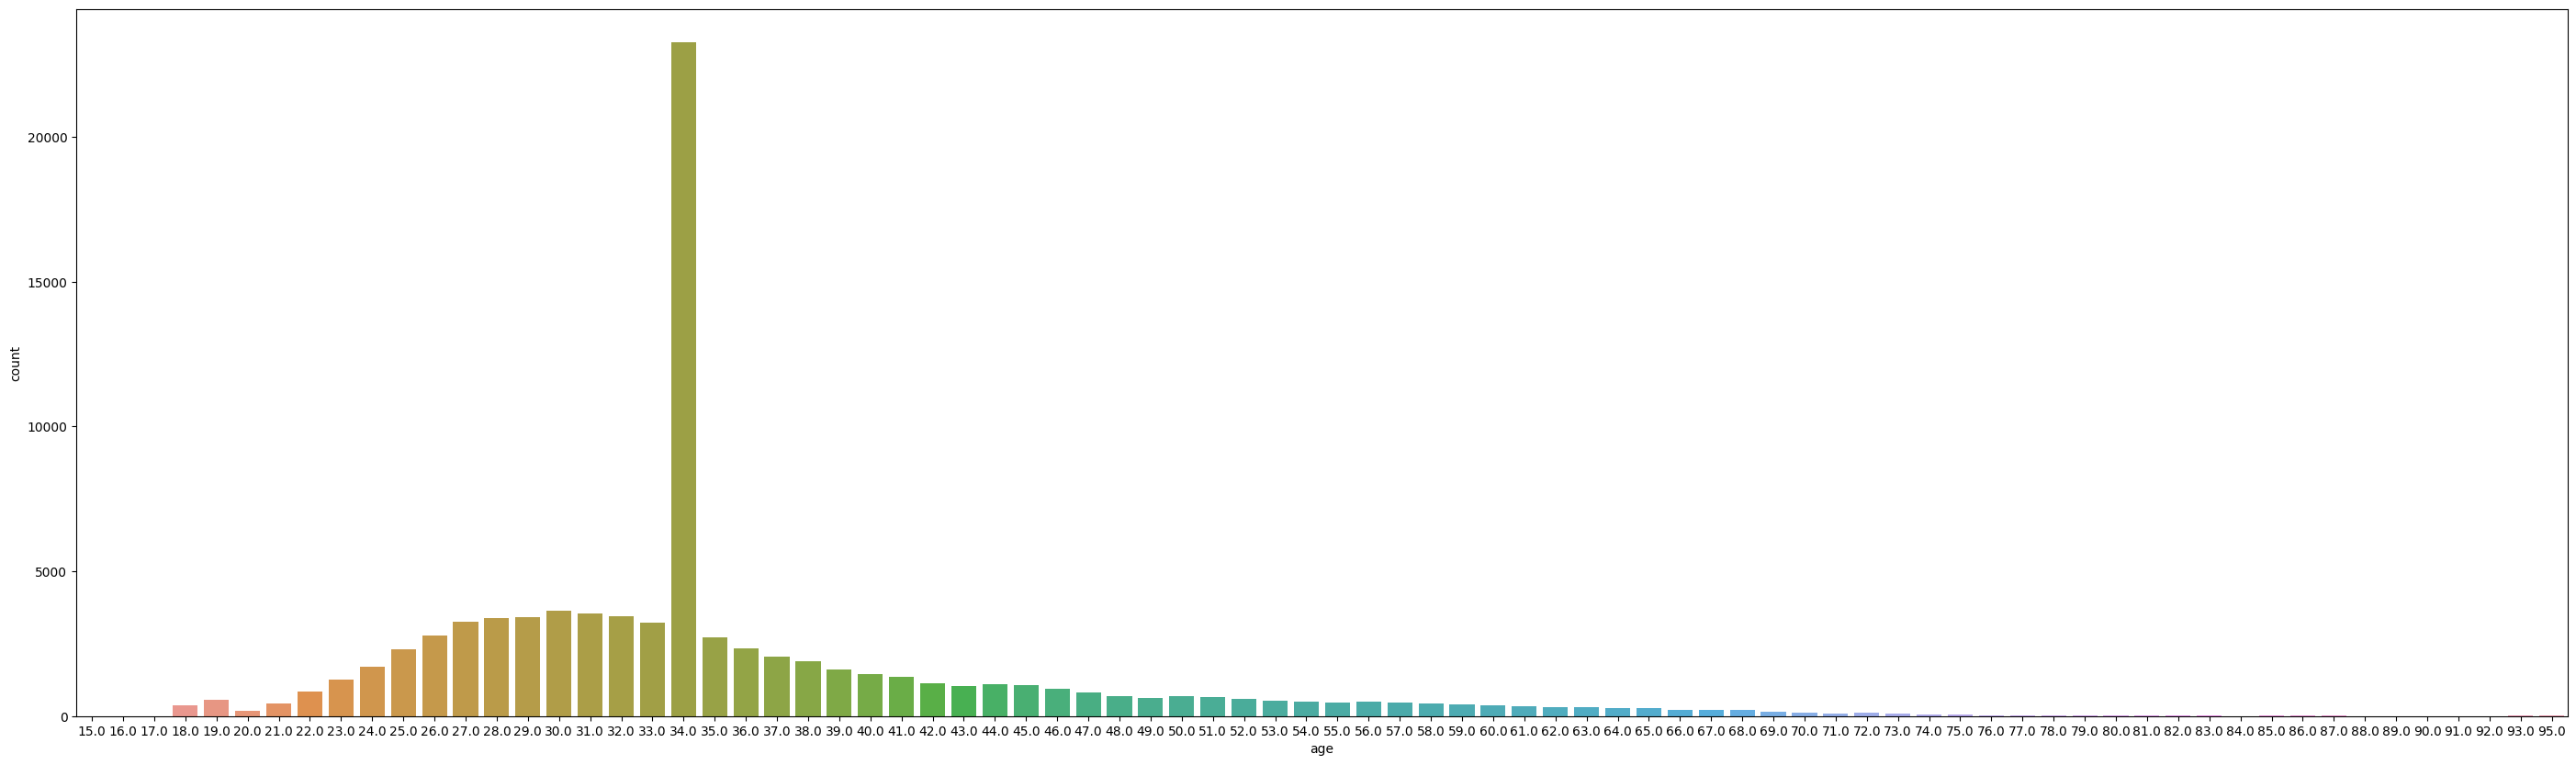

In [611]:
plt.figure(figsize=(35,10))
sns.countplot(x='age',data=train_data)#outliers are sucessfully removed
plt.show()

In [612]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
train_data.loc[train_data.gender=='MALE', 'gender'] = 0
train_data.loc[train_data.gender=='FEMALE', 'gender'] = 1
train_data.loc[train_data.gender=='-unknown-', 'gender'] = 2
train_data.loc[train_data.gender=='OTHER', 'gender'] = 3
#train_data.loc[(train_data.age > 15)  & (train_data.age < 20), 'age'] =4
#train_data.loc[(train_data.age >= 20) & (train_data.age <= 40), 'age'] =5
#train_data.loc[(train_data.age >= 40) & (train_data.age <= 60), 'age'] =6
#train_data.loc[(train_data.age >= 60) & (train_data.age <= 95), 'age'] =7
#train_data['date_account_created'] = pd.to_datetime((train_data['date_account_created']))
#train_data[["day", "month", "year"]] = train_data["date_account_created"].str.split("-", expand = True)
#print(int(train_data["month"]))
train_data['date_account_created'] = train_data['date_account_created'].apply(pd.Timestamp.timestamp)
train_data.head()
feature_cols=['gender','date_account_created']
x=train_data[feature_cols]
y=train_data.country_destination
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [613]:
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [614]:
#Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6865511835111469


Trying KNN classifier to find its accuracy

In [615]:
import numpy as np # linear algebra, data manipulation
import pandas as pd # data processing, # Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# change to  dates and time default formats
from datetime import datetime
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [616]:
train_data= pd.read_csv('C:\\Users\\HP\\Desktop\\train_users_2.csv')
test_data= pd.read_csv('C:\\Users\\HP\\Desktop\\test_users.csv')

In [617]:
train_data.loc[(train_data.age > 95) | (train_data.age < 15), 'age'] = np.nan
train_data['age']= train_data['age'].fillna(train_data['age'].median())
train_data.dropna(inplace=True) #The dropna () method removes the rows that contains NULL values
train_data=train_data.drop_duplicates() #used to remove duplicate values
train_data =train_data.drop(['id'],axis=1) #removing id because it is not useful in our dataset , values are very large

In [618]:

train_data=pd.get_dummies(train_data,columns=['gender','signup_method','language','affiliate_channel'
                              ,'affiliate_provider','first_affiliate_tracked','signup_app','first_device_type','first_browser'])
X=train_data.drop(columns='country_destination',axis=1)
y=train_data['country_destination']
train_data['date_account_created'] = pd.to_datetime((train_data['date_account_created']))
train_data['timestamp_first_active'] = pd.to_datetime((train_data['timestamp_first_active']))
train_data['date_first_booking'] = pd.to_datetime((train_data['date_first_booking']))
g=train_data.groupby('date_account_created').agg('count')['country_destination']

train_data['date_account_created'] = train_data['date_account_created'].apply(pd.Timestamp.timestamp)
train_data['timestamp_first_active'] = train_data['timestamp_first_active'].apply(pd.Timestamp.timestamp)
train_data['date_first_booking'] = train_data['date_first_booking'].apply(pd.Timestamp.timestamp)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

#Creating StandardScaler Object
scaler = preprocessing.StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Seeing the scaled values of X_train

In [619]:
model=KNeighborsClassifier(n_neighbors=17) 
model.fit(X_train,y_train)

# Accuracy on Tesing Data
y_pred=model.predict(X_test) 
from sklearn import metrics 
print()
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.6962839364549658
